## Final Project Submission

- Student Names: Jillian Clark, Zach Pollatsek
- Student Pace: Full-Time
- Scheduled Review Date/Time: July 15, 2022
- Instructors: William and Daniel

## Overview and Business Problem

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether.

We are a data science consulting company who has been hired by the Tanzanian Ministry of Water to create a model to help classify whether water pumps are functional, functional but in need of repairs, and non-functional. We have been hired to help improve maintenance operations minimze waste of the Ministry's resources and only send out repair teams to pumps that are potentially in need of repairs or non-functional. While we want to maximize accuracy, we also want to maximize recall to ensure the people of Tanzania have access to potable water and few pumps that are non-functional or in need of repairs are over looked.

## Data Understanding

The data is sourced from Taarifa and the Tanzanian Ministry of Water. Data utilized can be found here: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/

For the purposes of our evaluation, we are utilizing the Training Set Labels and Training Set Values, which include data from 59,400 pumps. Our cleaned data contains information from 59,028 pumps. 

The following is a list of column names and descriptions:

* `amount_tsh` - Total static head (amount water available to waterpoint)
* `date_recorded` - The date the row was entered
* `funder` - Who funded the well
* `gps_height` - Altitude of the well
* `installer` - Organization that installed the well
* `longitude` - GPS coordinate
* `latitude` - GPS coordinate
* `wpt_name` - Name of the waterpoint if there is one
* `num_private` - 
* `basin` - Geographic water basin
* `subvillage` - Geographic location
* `region` - Geographic location
* `region_code` - Geographic location (coded)
* `district_code` - Geographic location (coded)
* `lga` - Geographic location
* `ward` - Geographic location
* `population` - Population around the well
* `public_meeting` - True/False
* `recorded_by` - Group entering this row of data
* `scheme_management` - Who operates the waterpoint
* `scheme_name` - Who operates the waterpoint
* `permit` - If the waterpoint is permitted
* `construction_year` - Year the waterpoint was constructed
* `extraction_type` - The kind of extraction the waterpoint uses
* `extraction_type_group` - The kind of extraction the waterpoint uses
* `extraction_type_class` - The kind of extraction the waterpoint uses
* `management` - How the waterpoint is managed
* `management_group` - How the waterpoint is managed
* `payment` - What the water costs
* `payment_type` - What the water costs
* `water_quality` - The quality of the water
* `quality_group` - The quality of the water
* `quantity` - The quantity of water
* `quantity_group` - The quantity of water
* `source` - The source of the water
* `source_type` - The source of the water
* `source_class` - The source of the water
* `waterpoint_type` - The kind of waterpoint
* `waterpoint_type_group` - The kind of waterpoint

Our data cleaning steps are shown in the notebook named 'data_cleaning' and our final cleaned dataset is saved as 'final_data.csv'. We import our final dataset here for analysis and modeling.

## Data Analysis

Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as SNS
%matplotlib inline

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, \
                            plot_confusion_matrix, plot_roc_curve, roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

import xgboost
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline


from yellowbrick.classifier import ROCAUC
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette

In [2]:
# read in cleaned data file
df = pd.read_csv('final_data.csv', index_col=0)
df.head()

,amount_tsh,funder,gps_height,installer,basin,region_code,district_code,public_meeting,scheme_management,permit,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,status_group,age
0,6000.0,Other,1390,Other,Lake Nyasa,11,5,True,VWC,False,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional,23
1,0.0,Other,1399,Other,Lake Victoria,20,2,Unknown,Other,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,12
2,25.0,Other,686,Other,Pangani,21,4,True,VWC,True,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,13
3,0.0,Unicef,263,Other,Ruvuma / Southern Coast,90,63,True,VWC,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,36
4,0.0,Other,0,Other,Lake Victoria,18,1,True,Unknown,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,22


In [3]:
df.shape

(59028, 19)

In [4]:
# Create our predictors and target
X = df.drop('status_group', axis=1)
y = df.status_group

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
X_train.head()

,amount_tsh,funder,gps_height,installer,basin,region_code,district_code,public_meeting,scheme_management,permit,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,age
34904,5.0,Germany Republi,1376,CES,Pangani,3,5,True,Water Board,True,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,16
4442,0.0,Other,947,Other,Ruvuma / Southern Coast,10,2,True,VWC,True,gravity,vwc,never pay,soft,enough,river,communal standpipe,35
11884,0.0,Other,227,Other,Ruvuma / Southern Coast,8,3,True,VWC,False,gravity,vwc,never pay,unknown,dry,rainwater harvesting,communal standpipe,20
38675,0.0,Hesawa,1152,DWE,Lake Victoria,19,1,True,Unknown,True,other,vwc,never pay,soft,insufficient,shallow well,other,14
34585,50.0,Government Of Tanzania,248,DWE,Wami / Ruvu,6,3,True,Water Board,False,gravity,water board,pay per bucket,salty,insufficient,dam,communal standpipe,14


In [7]:
# Confirm that out training data set is 3x larger than the testing dataset
print(X_train.shape, X_test.shape)

(44271, 18) (14757, 18)


In [8]:
y.value_counts(normalize=True)

functional                 0.543030
non functional             0.383852
functional needs repair    0.073118
Name: status_group, dtype: float64

It appears that our distribution of target values is relatively uneven; only 7% of our data represents water wells that are functional but need repair. We will run baseline models to determine if we need to use SMOTE to oversample these observations.

# Modeling

### Dummy Model

First, we will create a dummy model that always predicts the most frequent class. In this case, our dummy model will predict that all of the water wells are functional.

In [9]:
# Instantiate our dummy regressor object
dummy = DummyClassifier(strategy='most_frequent')

In [10]:
# Fit the model on our training data
dummy.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [11]:
# Inspect the accuracy of our initial dummy model
dummy_score = dummy.score(X_train, y_train)

Our dummy model accuracy of 54.6% reflects the distribution of our target. Thus, if we always predict that a water well is functional, we will achieve 54.6% accuracy.

### Set Up Column Transformer

In [12]:
# Create our sub pipelines for numeric and categorial data
subpipe_num = Pipeline(steps=[('ss', StandardScaler())])
subpipe_cat = Pipeline(steps=[('ohe', OneHotEncoder(sparse=False,
                                                    handle_unknown='ignore'))])
subpipe_ord = Pipeline(steps=[('ord', OrdinalEncoder())])
subpipe_smote = SMOTE(sampling_strategy='auto', random_state=42)
subpipe_smote2 = SMOTE(sampling_strategy='minority', random_state=42)

In [13]:
# Include our sub pipelines in a column transformer to OHE our categorial variables and scale our numerical variables.
CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, [0,2,17]), 
                                     ('subpipe_cat', subpipe_cat, [1,3,4,5,6,7,8,10,11,12,13,14,15,16]), 
                                     ('subpipe_ord', subpipe_ord, [9])])

### Create Pipeline for Simple Models

We will start our process with the creation of simpler classification models to steer us in some direction for future, more complex models. We have decided to initially run logistic regression, K nearest neighbors, and decision tree classifier models all with default hyperparameters (except for a random state, as this allows others to replicate our code). 

In [14]:
# instantiate each pipeline object for the 3 simpler models
# include column transformer as first step in each pipeline
logreg_pipe = Pipeline(steps=[('CT', CT), 
                              ('logreg', LogisticRegression(random_state=42))])

knn_pipe = Pipeline(steps=[('CT', CT), 
                           ('knn', KNeighborsClassifier())])

dtc_pipe = Pipeline(steps=[('CT', CT), 
                           ('dtc', DecisionTreeClassifier(random_state=42))])


In [15]:
# Fit each pipeline to our training data
#logreg_pipe.fit(X_train, y_train)
#knn_pipe.fit(X_train, y_train)
#dtc_pipe.fit(X_train, y_train)

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  [0, 2, 17]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 3, 4, 5, 6, 7, 8, 10, 11,
                                                   12, 13, 14, 15, 16]),
                                                 ('subpipe_ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder())]),
                                                  [9])])),
                ('dtc', DecisionTreeClassifier(random_state=42))])

In [16]:
# Get initial accuracy scores for each our our simple classifier models
#logreg_score = logreg_pipe.score(X_train, y_train)
#knn_score = knn_pipe.score(X_train, y_train)
#dtc_score = dtc_pipe.score(X_train, y_train)

In [17]:
# Print out initial accuracy scores
#print(f'Logistic Regression Accuracy: {round(logreg_score * 100, 2)}%')
#print(f'KNearestNeighbors Accuracy: {round(knn_score * 100, 2)}%')
#print(f'DecisionTree Accuracy: {round(dtc_score * 100, 2)}%')

Logistic Regression Accuracy: 74.64%
KNearestNeighbors Accuracy: 82.55%
DecisionTree Accuracy: 94.41%


In [ ]:
#Results of our simpler models:
#Logistic Regression Accuracy: 74.64%
#KNearestNeighbors Accuracy: 82.55%
#DecisionTree Accuracy: 94.41%

Our initial numbers appear to be relatively good. We expect our decision tree classifier to be overfit given the high accuracy score. We will dive deeper into more complex models below to maximize our accuracy and recall. Given that our decision tree had the highest initial accuracy (even though it was overfit), we will try a random forest classifier for our first complex model. 

### Random Forest

In [18]:
# Create our random forest pipeline to incorporate column transformer, use default hyperparameters
rfc_pipe = Pipeline(steps=[('CT', CT),
                           ('rfc', RandomForestClassifier(random_state=42))])

In [19]:
# Fit our random forest classifier to the training data
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  [0, 2, 17]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 3, 4, 5, 6, 7, 8, 10, 11,
                                                   12, 13, 14, 15, 16]),
                                                 ('subpipe_ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder())]),
                                                  [9])])),
                ('rfc', RandomForestClassifier(random_state=42))])

In [20]:
# Calculate initial accuracy score of random forest with default hyperparameters
rfc_pipe.score(X_train, y_train)

0.9440491518149579

In [21]:
# Perform a cross validation to determine whether or not the model is overfit
avg_rf_cv = np.mean(cross_val_score(estimator=rfc_pipe, X=X_train, y=y_train, cv=5))

In [22]:
avg_rf_cv

0.77890717565598

Given that our cross validation scores were significantly lower than the accuracy score from our single random forest classifier, we can say that this model is overfit to the training data. We will perform a grid search in order to optimize the hyper parameters of this classifier. The main parameter we will use to reduce overfitting is the max depth hyperparameter because this will stop the model from running before it is only comprised of pure nodes

In [23]:
# create our grid for the grid search parameters
params = {'rfc__n_estimators': [50, 100, 150],
          'rfc__min_samples_split': [2, 10, 50],
          'rfc__max_depth': [5, 10, 15]}

# set up GridSearchCV object
grid_rfc = GridSearchCV(rfc_pipe, param_grid=params, cv=5)

In [24]:
# fit our grid object for random forests to the training data
#grid_rfc.fit(X_train, y_train)

In [25]:
# find the best hyper parameters from our first grid search
#grid_rfc.best_params_

In [26]:
# calculate the best accuracy score from our first grid search
#grid_rfc.best_score_

**From our initial grid search, we attained an accuracy of 78.0% using a max_depth of 15, a min_samples_split of 2, and an n_estimators of 150.** Next, we will play with the max depth hyper parameter a bit more since the best value was at the top of our range in the initial grid search


In [28]:
#pd.DataFrame(grid_rfc.cv_results_)

Based on our initial grid search results, we can infer that a larger max depth is needed to improve accuracy. 

In [29]:
# create our grid for the grid search parameters
params2 = {'rfc__n_estimators': [50, 100, 150],
           'rfc__max_depth': [15, 25, 50]}

# set up GridSearchCV object
grid_rfc2 = GridSearchCV(rfc_pipe, param_grid=params2, cv=5)

In [30]:
# fit our grid object with parameter updates for random forests to the training data
#grid_rfc2.fit(X_train, y_train)

In [31]:
# find the best hyper parameters from our second grid search
#grid_rfc2.best_params_

In [32]:
# calculate the best accuracy score from our second grid search
#grid_rfc2.best_score_

**From our second grid search, we attained an accuracy of 78.9% using a max_depth of 25 and an n_estimators of 150.** We can increase the maximum end of our range for the number of decision trees in the random forest as well as the max depth given that the best hyperparameters were the maximum values for each range.

In [33]:
#pd.DataFrame(grid_rfc2.cv_results_)

Based on our new grid search, we can see that a maximum depth greater than 15 but less than 50 is ideal. We will also try running the grid search with a higher number of trees in the random forest to improve accuracy.

In [34]:
# create our grid for the grid search parameters
params3 = {'rfc__n_estimators': [100, 150, 200],
           'rfc__max_depth': [20, 25, 30]}

# set up GridSearchCV object
grid_rfc3 = GridSearchCV(rfc_pipe, param_grid=params3, cv=5)

In [35]:
# Fit the grid object to our training data with updated grid params for n_estimators and max_depth
#grid_rfc3.fit(X_train, y_train)

In [36]:
# find the best hyper parameters from our third grid search
#grid_rfc3.best_params_

In [37]:
# calculate the best accuracy score from our third grid search
#grid_rfc3.best_score_

**From our third grid search, we attained an accuracy of 79.3% using a max_depth of 20 and an n_estimators of 200.** 

In [38]:
#pd.DataFrame(grid_rfc3.cv_results_)

In [39]:
# create our grid for the grid search parameters
params4 = {'rfc__n_estimators': [100, 150],
           'rfc__max_depth': [18, 20, 22],
           'rfc__max_features': ['auto', 'sqrt', 0.2]}

# set up GridSearchCV object
grid_rfc4 = GridSearchCV(rfc_pipe, param_grid=params4, cv=5)

In [40]:
# Fit the grid object to our training data with updated grid params for n_estimators, max_depth, and max_features
#grid_rfc4.fit(X_train, y_train)

In [41]:
# find the best hyper parameters from our fourth grid search
#grid_rfc4.best_params_

In [42]:
# calculate the best accuracy score from our fourth grid search
#grid_rfc4.best_score_

**From our fourth grid search, we attained an accuracy of 79.3% using a max_depth of 20, a max_features of 0.2, and an n_estimators of 150.** 

In [43]:
#pd.DataFrame(grid_rfc4.cv_results_)

In [44]:
# create our massive grid for the grid search parameters
params5 = {'rfc__n_estimators': [125, 150, 175],
           'rfc__max_depth': [15, 20, 25],
           'rfc__max_features': ['sqrt', 0.1, 0.2, 0.5],
           'rfc__min_samples_leaf': [25, 50, 100],
           'rfc__min_impurity_decrease': [0, 0.025, 0.05, 0.075, 0.1],
           'rfc__criterion': ['gini', 'entropy', 'log_loss']}

# set up GridSearchCV object
#grid_rfc5 = GridSearchCV(rfc_pipe, param_grid=params5, cv=5)

In [45]:
# Fit the grid search object to our training data to check numerous hyperparameters.
#grid_rfc5.fit(X_train, y_train)

In [46]:
#grid_rfc5.best_params_

In [47]:
#grid_rfc5.best_score_

**From our fifth grid search, we attained an accuracy of 77.5% using a max_depth of 25, a max_features of 0.5, an entropy criterion, a minimum impurity decrease of 0, a minimum samples per leaf of 25, and an n_estimators of 175.** 

In [48]:
#pd.DataFrame(grid_rfc5.cv_results_)

In [49]:
# create our grid for the grid search parameters
params6 = {'rfc__n_estimators': [100, 150, 200],
           'rfc__max_depth': [18, 20, 22],
           'rfc__max_features': [0.1, 0.2, 0.5]}

# set up GridSearchCV object
grid_rfc6 = GridSearchCV(rfc_pipe, param_grid=params6, cv=5)

In [50]:
# Fit our sixth grid search on the training data
#grid_rfc6.fit(X_train, y_train)

In [51]:
#grid_rfc6.best_params_

In [52]:
#grid_rfc6.best_score_

In [53]:
#rf_preds6 = grid_rfc6.predict(X_train)

In [54]:
#grid_rfc6.score(X_train, y_train)

In [55]:
#plot_confusion_matrix(grid_rfc6, X_train, y_train);

In [56]:
#print(classification_report(y_train, rf_preds6))

**From our sixth grid search, we attained an accuracy of 79.3% using a max_depth of 20, a max_features of 0.1, and an n_estimators of 200.** 

In [57]:
#pd.DataFrame(grid_rfc6.cv_results_)

We decided to utilize SMOTE to address class imbalance and see if we could improve our accuracy score.

### Random Forest with SMOTE

In [58]:
# Create our random forest pipeline to incorporate column transformer
rfc_pipe_sm = ImPipeline(steps=[('CT', CT),
                                ('sm', subpipe_smote),
                                ('rfc', RandomForestClassifier(random_state=42))])

In [59]:
# Fit training data to our new random forest pipe using SMOTE to over sample minority classes
#rfc_pipe_sm.fit(X_train, y_train)

Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  [0, 2, 17]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 3, 4, 5, 6, 7, 8, 10, 11,
                                                   12, 13, 14, 15, 16]),
                                                 ('subpipe_ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder())]),
                                                  [9])])),
                ('sm', SMOTE(random_state=42)),
                ('rfc', RandomForestClassifier(random_state=42))])

In [60]:
#rfc_pipe_sm.score(X_train, y_train)

0.9320322558785661

In [ ]:
#accuracy score of 0.9320322558785661

In [61]:
#cross_val_score(rfc_pipe_sm, X_train, y_train)

array([0.75787691, 0.76157669, 0.7605602 , 0.77185453, 0.76372261])

In [ ]:
#cross val scores of ([0.75787691, 0.76157669, 0.7605602 , 0.77185453, 0.76372261])

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


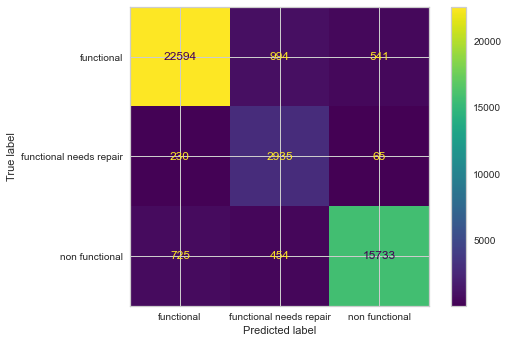

In [62]:
#plot_confusion_matrix(rfc_pipe_sm, X_train, y_train);

In [63]:
#print(classification_report(y_train, rfc_pipe_sm.predict(X_train)))

                         precision    recall  f1-score   support

             functional       0.96      0.94      0.95     24129
functional needs repair       0.67      0.91      0.77      3230
         non functional       0.96      0.93      0.95     16912

               accuracy                           0.93     44271
              macro avg       0.86      0.93      0.89     44271
           weighted avg       0.94      0.93      0.93     44271



In [ ]:
#recall scores of .94, .91, .93

In [70]:
# create our grid for the grid search parameters
params = {'rfc__n_estimators': [50, 100, 150],
          'rfc__min_samples_split': [2, 10, 50],
          'rfc__max_depth': [5, 10, 15]}

# set up GridSearchCV object
grid_rfc_sm = GridSearchCV(rfc_pipe_sm, param_grid=params, cv=5)

In [71]:
#grid_rfc_sm.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         [0, 2,
                                                                          17]),
                                                                        ('subpipe_cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         [1, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8, 10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16]),
                                                                        ('subpipe_ord',
                                                                         Pipeline(steps=[('ord',
                                                                                          OrdinalEncoder())]),
                                                                         [9])])),
                                       ('sm', SMOTE(random_state=42)),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rfc__max_depth': [5, 10, 15],
                         'rfc__min_samples_split': [2, 10, 50],
                         'rfc__n_estimators': [50, 100, 150]})

In [72]:
#grid_rfc_sm.best_params_

{'rfc__max_depth': 15, 'rfc__min_samples_split': 2, 'rfc__n_estimators': 150}

In [73]:
#grid_rfc_sm.best_score_

0.7435116987195635

**We attained an accuracy of 74.4% using a max_depth of 15, a min_samples_split of 2 and n_estimators of 150.** 

In [74]:
#print(classification_report(y_train, grid_rfc_sm.predict(X_train)))

                         precision    recall  f1-score   support

             functional       0.85      0.82      0.84     24129
functional needs repair       0.36      0.78      0.49      3230
         non functional       0.91      0.75      0.82     16912

               accuracy                           0.79     44271
              macro avg       0.71      0.78      0.72     44271
           weighted avg       0.84      0.79      0.81     44271



In [ ]:
#Recall scores of .82, .78, .75

In [75]:
# create our grid for the grid search parameters
params2 = {'rfc__n_estimators': [50, 100, 150],
           'rfc__max_depth': [15, 25, 50]}

# set up GridSearchCV object
grid_rfc_sm2 = GridSearchCV(rfc_pipe_sm, param_grid=params2, cv=5)

In [76]:
#grid_rfc_sm2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         [0, 2,
                                                                          17]),
                                                                        ('subpipe_cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         [1, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8, 10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16]),
                                                                        ('subpipe_ord',
                                                                         Pipeline(steps=[('ord',
                                                                                          OrdinalEncoder())]),
                                                                         [9])])),
                                       ('sm', SMOTE(random_state=42)),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rfc__max_depth': [15, 25, 50],
                         'rfc__n_estimators': [50, 100, 150]})

In [77]:
#grid_rfc_sm2.best_params_

{'rfc__max_depth': 25, 'rfc__n_estimators': 150}

In [78]:
#grid_rfc_sm2.best_score_

0.7655802996269108

**We attained an accuracy of 76.6% using a max_depth of 25, and n_estimators of 150.** 

In [86]:
#print(classification_report(y_train, grid_rfc_sm2.predict(X_train)))

                         precision    recall  f1-score   support

             functional       0.94      0.92      0.93     24129
functional needs repair       0.59      0.88      0.71      3230
         non functional       0.96      0.90      0.93     16912

               accuracy                           0.91     44271
              macro avg       0.83      0.90      0.85     44271
           weighted avg       0.92      0.91      0.91     44271



In [87]:
#Recall scores of .92, .88, .90

In [88]:
# create our grid for the grid search parameters
params3 = {'rfc__n_estimators': [100, 150, 200],
           'rfc__max_depth': [20, 25, 30]}

# set up GridSearchCV object
grid_rfc_sm3 = GridSearchCV(rfc_pipe_sm, param_grid=params3, cv=5, n_jobs=-1)

In [89]:
#grid_rfc_sm3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         [0, 2,
                                                                          17]),
                                                                        ('subpipe_cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         [1, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8, 10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16]),
                                                                        ('subpipe_ord',
                                                                         Pipeline(steps=[('ord',
                                                                                          OrdinalEncoder())]),
                                                                         [9])])),
                                       ('sm', SMOTE(random_state=42)),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [20, 25, 30],
                         'rfc__n_estimators': [100, 150, 200]})

In [90]:
#grid_rfc_sm3.best_params_

{'rfc__max_depth': 25, 'rfc__n_estimators': 200}

In [91]:
#grid_rfc_sm3.best_score_

0.767048486030425

**We attained an accuracy of 76.7% using a max_depth of 25, and n_estimators of 200.** 

In [204]:
#print(classification_report(y_train, grid_rfc_sm3.predict(X_train)))

In [ ]:
#recall scores of .92, .88, .90

In [93]:
# create our grid for the grid search parameters
params4 = {'rfc__n_estimators': [100, 150],
           'rfc__max_depth': [18, 20, 22],
           'rfc__max_features': ['auto', 'sqrt', 0.2]}

# set up GridSearchCV object
grid_rfc_sm4 = GridSearchCV(rfc_pipe_sm, param_grid=params4, cv=5, n_jobs=-1)

In [94]:
#grid_rfc_sm4.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         [0, 2,
                                                                          17]),
                                                                        ('subpipe_cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         [1, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8, 10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16]),
                                                                        ('subpipe_ord',
                                                                         Pipeline(steps=[('ord',
                                                                                          OrdinalEncoder())]),
                                                                         [9])])),
                                       ('sm', SMOTE(random_state=42)),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [18, 20, 22],
                         'rfc__max_features': ['auto', 'sqrt', 0.2],
                         'rfc__n_estimators': [100, 150]})

In [95]:
#grid_rfc_sm4.best_params_

{'rfc__max_depth': 22, 'rfc__max_features': 0.2, 'rfc__n_estimators': 150}

In [96]:
#grid_rfc_sm4.best_score_

0.7670033112603899

**We attained an accuracy of 76.7% using a max_depth of 22, max_features of .2, and n_estimators of 200.** 

In [97]:
#print(classification_report(y_train, grid_rfc_sm4.predict(X_train)))

                         precision    recall  f1-score   support

             functional       0.92      0.91      0.92     24129
functional needs repair       0.57      0.86      0.68      3230
         non functional       0.95      0.87      0.91     16912

               accuracy                           0.89     44271
              macro avg       0.81      0.88      0.84     44271
           weighted avg       0.91      0.89      0.90     44271



In [ ]:
#recall scores of .91, .86. .87

In [98]:
# create our grid for the grid search parameters
params5 = {'rfc__n_estimators': [100, 150, 200],
           'rfc__max_depth': [18, 20, 22],
           'rfc__max_features': [0.1, 0.2, 0.5]}

# set up GridSearchCV object
grid_rfc_sm5 = GridSearchCV(rfc_pipe_sm, param_grid=params5, cv=5, n_jobs=-1)

In [99]:
grid_rfc_sm5.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         [0, 2,
                                                                          17]),
                                                                        ('subpipe_cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         [1, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8, 10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16]),
                                                                        ('subpipe_ord',
                                                                         Pipeline(steps=[('ord',
                                                                                          OrdinalEncoder())]),
                                                                         [9])])),
                                       ('sm', SMOTE(random_state=42)),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [18, 20, 22],
                         'rfc__max_features': [0.1, 0.2, 0.5],
                         'rfc__n_estimators': [100, 150, 200]})

In [205]:
grid_rfc_sm5.score(X_train, y_train)

0.893045108536062

In [206]:
grid_rfc_sm5.best_params_

{'rfc__max_depth': 22, 'rfc__max_features': 0.2, 'rfc__n_estimators': 200}

**We attained an accuracy of 89.3% using a max_depth of 22, max_features of .2, and n_estimators of 200.** 

Next, we wanted to try to see if we could improve our results utillizing an XGBoost model.

### XGBoost

In [100]:
# Instantiate our default XGB pipeline
XGB_pipe = ImPipeline(steps=[('CT', CT), 
                             ('XGB', XGBClassifier())])


In [101]:
# Fit the xgb pipeline to our training data
#XGB_pipe.fit(X_train, y_train)

Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  [0, 2, 17]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 3, 4, 5, 6, 7, 8, 10, 11,
                                                   12, 13, 14, 15, 16]),
                                                 ('subpipe_ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder())]),
                                                  [9])])),
                ('XGB',
                 XGBClassifier(base_score=...
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [102]:
#training_preds = XGB_pipe.predict(X_train)

In [103]:
#print(classification_report(y_train, training_preds))

                         precision    recall  f1-score   support

             functional       0.79      0.94      0.86     24129
functional needs repair       0.75      0.28      0.41      3230
         non functional       0.88      0.75      0.81     16912

               accuracy                           0.82     44271
              macro avg       0.81      0.66      0.69     44271
           weighted avg       0.82      0.82      0.81     44271



In [207]:
#recall scores of .94, .28, .75, accuracy score of .82

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


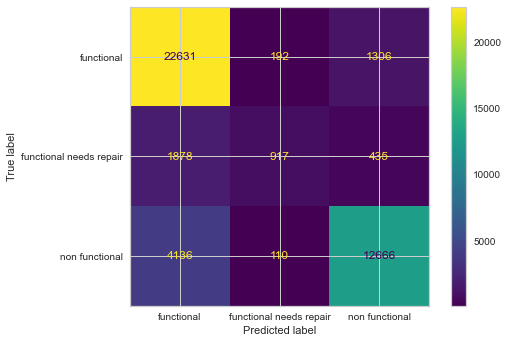

In [104]:
#plot_confusion_matrix(XGB_pipe, X_train, y_train);

In [106]:
avg_XGB_cv = np.mean(cross_val_score(XGB_pipe, X_train, y_train))

In [107]:
avg_XGB_cv

0.7860224991221544

In [ ]:
#average cross val score of 78.6%

We tried running XGBoost with SMOTE to account for unbalanced data.

In [109]:
# Instantiate XGBClassifier with SMOTE subpipe
XGB_sm_pipe = ImPipeline(steps=[('CT', CT), 
                           ('sm', subpipe_smote),
                            ('XGB', XGBClassifier())])

In [110]:
#XGB_sm_pipe.fit(X_train, y_train)

Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  [0, 2, 17]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 3, 4, 5, 6, 7, 8, 10, 11,
                                                   12, 13, 14, 15, 16]),
                                                 ('subpipe_ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder())]),
                                                  [9])])),
                ('sm', SMOTE(random_state=42)),
                ('...
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [111]:
# Predict on training and test sets
#training_preds = XGB_sm_pipe.predict(X_train)

# Accuracy of training and test sets
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average= None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print (training_recall)

Training Accuracy: 78.66%
[0.83219363 0.62879257 0.75171476]


In [112]:
#Training Accuracy: 78.42%
#Recall values: .8279, .6260, .7521

In [113]:
##Setting up grid search for XGB to find optimal parameters; commenting out due to large run time

In [114]:
# create our massive grid for the grid search parameters
paramsXGB = {
    'XGB__learning_rate': [0.1, 0.2],
    'XGB__max_depth': range(3, 10, 2),
    'XGB__min_child_weight': range(1, 8, 2),
    'XGB__gamma': [0, .1, .2],
    'XGB__subsample': [.5, .75, 1]
}

In [115]:
grid_XGB = GridSearchCV(XGB_pipe, param_grid=paramsXGB, cv=5, verbose=3, n_jobs=-1)

#Fit grid search object to our training data to check the hyper parameters

In [116]:
#grid_XGB.fit(X_train, y_train)

In [117]:
#best_parameters = grid_XGB.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_XGB.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

In [118]:
#Grid Search found the following optimal parameters: 
#XGB__gamma: 0.1
#XGB__learning_rate: 0.2
#XGB__max_depth: 9
#XGB__min_child_weight: 1
#XGB__subsample: 0.75
#Training Accuracy: 82.33%
#Traing Recall: [0.86116292 0.67956656 0.79677152]

In [119]:
##XGBoost using optimal parameters improved overall accuracy and recall values

In [120]:
#Created pipeline using Best Params from grid search

In [121]:
XGB_pipe2 = ImPipeline(steps=[('CT', CT), 
                           ('sm', subpipe_smote),
                            ('XGB', XGBClassifier(gamma=.1, learning_rate=.2, max_depth=9,
                                                 min_child_weight=1, subsample=.75))])

In [122]:
#XGB_pipe2.fit(X_train, y_train)

Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  [0, 2, 17]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 3, 4, 5, 6, 7, 8, 10, 11,
                                                   12, 13, 14, 15, 16]),
                                                 ('subpipe_ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder())]),
                                                  [9])])),
                ('sm', SMOTE(random_state=42)),
                ('...
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=9,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=0.75, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [123]:
#XGB_pipe2.score(X_train, y_train)

0.823925368751553

In [ ]:
#accuracy score of 82.4%

In [124]:
#cross_val_score(estimator=XGB_pipe2, X=X_train, y=y_train, cv=5)

array([0.75776398, 0.76496499, 0.768918  , 0.77309691, 0.76586853])

In [ ]:
#Cross val scores of ([0.75776398, 0.76496499, 0.768918  , 0.77309691, 0.76586853])

In [125]:
#training_preds2 = XGB_pipe2.predict(X_train)

In [126]:
#print(classification_report(y_train, training_preds2))

                         precision    recall  f1-score   support

             functional       0.86      0.86      0.86     24129
functional needs repair       0.44      0.68      0.54      3230
         non functional       0.89      0.80      0.84     16912

               accuracy                           0.82     44271
              macro avg       0.73      0.78      0.75     44271
           weighted avg       0.84      0.82      0.83     44271



In [ ]:
#recall scores of .86, .68, .80

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


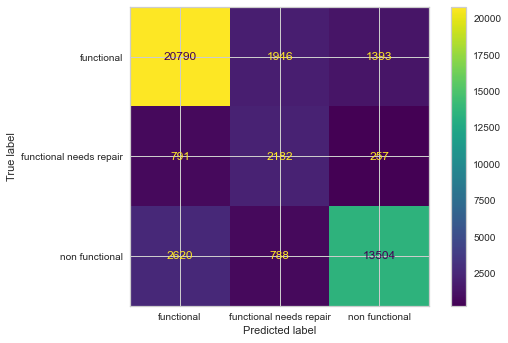

In [128]:
#plot_confusion_matrix(XGB_pipe2, X_train, y_train);

In [129]:
# will run the optimal paramenters with subpipe_smote2, which changes sampling strategy to minority

In [130]:
XGB_pipe3 = ImPipeline(steps=[('CT', CT), 
                           ('sm', subpipe_smote2),
                            ('XGB', XGBClassifier(gamma=.1, learning_rate=.2, max_depth=9,
                                                 min_child_weight=1, subsample=.75))])

In [131]:
#XGB_pipe3.fit(X_train, y_train)

Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  [0, 2, 17]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 3, 4, 5, 6, 7, 8, 10, 11,
                                                   12, 13, 14, 15, 16]),
                                                 ('subpipe_ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder())]),
                                                  [9])])),
                ('sm', SMOTE(random_state=42, samp...
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=9,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=0.75, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [132]:
#XGB_pipe3.score(X_train, y_train)

0.8215310248243771

In [ ]:
#accuracy score of 82.2%

In [133]:
#cross_val_score(estimator=XGB_pipe3, X=X_train, y=y_train, cv=5)

array([0.76171654, 0.76880506, 0.77264513, 0.77320985, 0.76417438])

In [ ]:
#cross val scores of [0.76171654, 0.76880506, 0.77264513, 0.77320985, 0.76417438])

In [134]:
#training_preds3 = XGB_pipe3.predict(X_train)

In [135]:
#print(classification_report(y_train, training_preds3))

                         precision    recall  f1-score   support

             functional       0.85      0.88      0.86     24129
functional needs repair       0.43      0.68      0.53      3230
         non functional       0.91      0.77      0.84     16912

               accuracy                           0.82     44271
              macro avg       0.73      0.78      0.74     44271
           weighted avg       0.84      0.82      0.83     44271



In [ ]:
#recall scores of .88, .68, .77

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


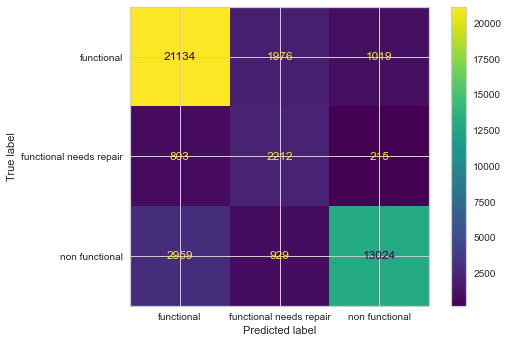

In [136]:
#plot_confusion_matrix(XGB_pipe3, X_train, y_train);

In [137]:
##We actually see more predictions for functional where the true label is non-functional or functional needs repair;
##because of this we would want to utilize XGB_pipe2 over XGB_pipe3

In [138]:
#Running grid search to see if changing k_neighbors for SMOTE effects results.

In [139]:
paramsXGB4 = {
    'sm__k_neighbors': [3, 5, 11],
}

In [140]:
XGB_pipe4 = ImPipeline(steps=[('CT', CT), 
                           ('sm', subpipe_smote),
                            ('XGB', XGBClassifier(gamma=.1, learning_rate=.2, max_depth=9,
                                                 min_child_weight=1, subsample=.75))])

In [141]:
#grid_XGB4 = GridSearchCV(XGB_pipe4, param_grid=paramsXGB4, cv=5, verbose=3)

In [142]:
#grid_XGB4.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .................sm__k_neighbors=3;, score=0.752 total time=  58.3s
[CV 2/5] END .................sm__k_neighbors=3;, score=0.762 total time=  55.9s
[CV 3/5] END .................sm__k_neighbors=3;, score=0.767 total time=  53.7s
[CV 4/5] END .................sm__k_neighbors=3;, score=0.770 total time=  46.6s
[CV 5/5] END .................sm__k_neighbors=3;, score=0.759 total time=  43.1s
[CV 1/5] END .................sm__k_neighbors=5;, score=0.758 total time=  42.6s
[CV 2/5] END .................sm__k_neighbors=5;, score=0.765 total time=  42.7s
[CV 3/5] END .................sm__k_neighbors=5;, score=0.769 total time=  40.2s
[CV 4/5] END .................sm__k_neighbors=5;, score=0.773 total time=  44.8s
[CV 5/5] END .................sm__k_neighbors=5;, score=0.766 total time=  47.0s
[CV 1/5] END ................sm__k_neighbors=11;, score=0.770 total time=  40.5s
[CV 2/5] END ................sm__k_neighbors=11;,

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         [0, 2,
                                                                          17]),
                                                                        ('subpipe_cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         [1, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8, 10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16]),
                                                                        ('subpipe_ord',
                                                                         Pipeline(steps=[('ord',
                                                                                          OrdinalEncoder())]),
                                                                         [9])])),
                                       ('sm...
                                                      learning_rate=0.2,
                                                      max_delta_step=None,
                                                      max_depth=9,
                                                      min_child_weight=1,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None,
                                                      scale_pos_weight=None,
                                                      subsample=0.75,
                                                      tree_method=None,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             param_grid={'sm__k_neighbors': [3, 5, 11]}, verbose=3)

In [143]:
#best_parameters4 = grid_XGB4.best_params_
#best_parameters4

{'sm__k_neighbors': 11}

In [144]:
#grid_XGB4.score(X_train, y_train)

0.8297982878182105

In [ ]:
#We found our best parameter is k_neighbors: 11 with accuracy score of 83.0

In [145]:
#We created a new subpipe using best parameter: k_neighbors: 11

In [146]:
subpipe_smote3 = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=11)

In [147]:
#created new pipeline with new subpipe_smote3

In [148]:
XGB_pipe5 = ImPipeline(steps=[('CT', CT), 
                           ('sm', subpipe_smote3),
                            ('XGB', XGBClassifier(gamma=.1, learning_rate=.2, max_depth=9,
                                                 min_child_weight=1, subsample=.75))])

In [149]:
#XGB_pipe5.fit(X_train, y_train)

Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  [0, 2, 17]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [1, 3, 4, 5, 6, 7, 8, 10, 11,
                                                   12, 13, 14, 15, 16]),
                                                 ('subpipe_ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder())]),
                                                  [9])])),
                ('sm', SMOTE(k_neighbors=11, rando...
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=9,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=0.75, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [150]:
#XGB_pipe5.score(X_train, y_train)

0.8297982878182105

In [ ]:
#accuracy score of 83.0%

In [151]:
#cross_val_score(estimator=XGB_pipe5, X=X_train, y=y_train, cv=5)

array([0.77018634, 0.77738875, 0.77400045, 0.78077705, 0.7723063 ])

In [ ]:
#cross val scores of [0.76171654, 0.76880506, 0.77264513, 0.77320985, 0.76417438])

In [152]:
#training_preds5 = XGB_pipe5.predict(X_train)

In [153]:
#print(classification_report(y_train, training_preds5))

                         precision    recall  f1-score   support

             functional       0.85      0.88      0.87     24129
functional needs repair       0.48      0.61      0.54      3230
         non functional       0.89      0.80      0.84     16912

               accuracy                           0.83     44271
              macro avg       0.74      0.76      0.75     44271
           weighted avg       0.84      0.83      0.83     44271



In [ ]:
#recall scores of .88, .61, .80

Next, we will look to see if we can improve our results by combining XGBoost with RF using Stacking.

### Combining XGBoost with RF using Stacking

In [154]:
# Set up random forest classifier to be used in stacking classifier
rfc_pipe_stack = ImPipeline(steps=[('CT', CT),
                                   ('sm', subpipe_smote),
                                   ('rfc', RandomForestClassifier(random_state=42))])

In [155]:
# Set up XGBoost to be used in stacking classifier
xgb_pipe_stack = ImPipeline(steps=[('CT', CT), 
                                   ('sm', subpipe_smote),
                                   ('XGB', XGBClassifier())])

In [156]:
# Instantiate initial stacking classifier object with our two models
stack = StackingClassifier(estimators=[('RandForest', rfc_pipe_stack),
                                       ('XGBoost', xgb_pipe_stack)],
                           verbose=3)

In [157]:
# Fit the stacking classifier to our training data
#stack.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   38.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   57.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.4min finished


StackingClassifier(estimators=[('RandForest',
                                Pipeline(steps=[('CT',
                                                 ColumnTransformer(transformers=[('subpipe_num',
                                                                                  Pipeline(steps=[('ss',
                                                                                                   StandardScaler())]),
                                                                                  [0,
                                                                                   2,
                                                                                   17]),
                                                                                 ('subpipe_cat',
                                                                                  Pipeline(steps=[('ohe',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse=False))]),
                                                                                  [1,
                                                                                   3,
                                                                                   4,
                                                                                   5,
                                                                                   6,
                                                                                   7,
                                                                                   8,
                                                                                   10,
                                                                                   11,
                                                                                   12,
                                                                                   13,
                                                                                   14,
                                                                                   15,
                                                                                   16]),
                                                                                 ('subpipe_ord',
                                                                                  Pipeline(steps=[('ord',
                                                                                                   OrdinalEncoder(...
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=None,
                                                               scale_pos_weight=None,
                                                               subsample=None,
                                                               tree_m

In [158]:
#stack.score(X_train, y_train)

0.8808700955478755

In [ ]:
#accuracy score of 88.1%

In [159]:
#avg_stack_cv = np.mean(cross_val_score(estimator=stack, X=X_train, y=y_train, cv=5))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   31.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   44.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   26.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

In [160]:
#avg_stack_cv

0.7917372746188021

In [ ]:
#average cross-val score of 79.2

In [161]:
# set up grid search for stacking classifier
stack_params = {
    'RandForest__rfc__n_estimators': [150, 200],
    'RandForest__rfc__max_depth': [15, 20, 25],
    'RandForest__rfc__max_features': [0.1, 0.2], 
    'XGBoost__XGB__max_depth': [5, 10, 20],
    'XGBoost__XGB__booster': ['gbtree', 'gblinear'],
    'XGBoost__XGB__eta': [0.3, 0.5]
}

In [162]:
#stack_grid = GridSearchCV(estimator=stack, param_grid=stack_params, n_jobs=-1, cv=5, verbose=3)

In [163]:
# Had to interrupt grid search because it had been running for over 1.5 days. Pulled some hyperparameters that led to 
# our best accuracy scores 
#stack_grid.fit(X_train, y_train)

In [164]:
# Set up random forest classifier to be used in stacking classifier
rfc_pipe_stack2 = ImPipeline(steps=[('CT', CT),
                                    ('sm', subpipe_smote),
                                    ('rfc', RandomForestClassifier(n_estimators=200, 
                                                                   max_depth=20, 
                                                                   max_features=0.1, 
                                                                   random_state=42))])

In [165]:
# Set up XGBoost to be used in stacking classifier
xgb_pipe_stack2 = ImPipeline(steps=[('CT', CT), 
                                    ('sm', subpipe_smote),
                                    ('XGB', XGBClassifier(max_depth=10, 
                                                          learning_rate=0.3, 
                                                          booster='gbtree'))])

In [166]:
# Instantiate initial stacking classifier object with our two models
stack2 = StackingClassifier(estimators=[('RandForest', rfc_pipe_stack2),
                                        ('XGBoost', xgb_pipe_stack2)],
                            verbose=3)

In [167]:
#stack2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   51.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.5min finished


StackingClassifier(estimators=[('RandForest',
                                Pipeline(steps=[('CT',
                                                 ColumnTransformer(transformers=[('subpipe_num',
                                                                                  Pipeline(steps=[('ss',
                                                                                                   StandardScaler())]),
                                                                                  [0,
                                                                                   2,
                                                                                   17]),
                                                                                 ('subpipe_cat',
                                                                                  Pipeline(steps=[('ohe',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse=False))]),
                                                                                  [1,
                                                                                   3,
                                                                                   4,
                                                                                   5,
                                                                                   6,
                                                                                   7,
                                                                                   8,
                                                                                   10,
                                                                                   11,
                                                                                   12,
                                                                                   13,
                                                                                   14,
                                                                                   15,
                                                                                   16]),
                                                                                 ('subpipe_ord',
                                                                                  Pipeline(steps=[('ord',
                                                                                                   OrdinalEncoder(...
                                                               interaction_constraints=None,
                                                               learning_rate=0.3,
                                                               max_delta_step=None,
                                                               max_depth=10,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=None,
                                                               scale_pos_weight=None,
                                                               subsample=None,
                                                               tree_meth

In [168]:
#stack2.score(X_train, y_train)

0.8759458787919857

In [ ]:
#accuracy score of 87.6

In [169]:
#cross_val_score(stack2, X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   36.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   51.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

array([0.78610954, 0.79274904, 0.79466908, 0.79839621, 0.78969957])

In [ ]:
#cross val scores of [0.78610954, 0.79274904, 0.79466908, 0.79839621, 0.78969957]

In [209]:
#np.mean([0.78610954, 0.79274904, 0.79466908, 0.79839621, 0.78969957])

0.7923246879999999

In [ ]:
#cross validation mean of 79.2325

In [171]:
rfc_pipe_stack3 = ImPipeline(steps=[('CT', CT),
                                    ('sm', subpipe_smote),
                                    ('rfc', RandomForestClassifier(n_estimators=150,
                                                                   max_depth=25,
                                                                   max_features=0.2,
                                                                   random_state=42))])

In [172]:
xgb_pipe_stack3 = ImPipeline(steps=[('CT', CT), 
                                    ('sm', subpipe_smote),
                                    ('XGB', XGBClassifier(max_depth=5,
                                                          learning_rate=0.3,
                                                          booster='gbtree'))])

In [173]:
stack3 = StackingClassifier(estimators=[('RandForest', rfc_pipe_stack3),
                                        ('XGBoost', xgb_pipe_stack3)],
                            verbose=3)

In [174]:
#stack3.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   55.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   52.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.2min finished


StackingClassifier(estimators=[('RandForest',
                                Pipeline(steps=[('CT',
                                                 ColumnTransformer(transformers=[('subpipe_num',
                                                                                  Pipeline(steps=[('ss',
                                                                                                   StandardScaler())]),
                                                                                  [0,
                                                                                   2,
                                                                                   17]),
                                                                                 ('subpipe_cat',
                                                                                  Pipeline(steps=[('ohe',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse=False))]),
                                                                                  [1,
                                                                                   3,
                                                                                   4,
                                                                                   5,
                                                                                   6,
                                                                                   7,
                                                                                   8,
                                                                                   10,
                                                                                   11,
                                                                                   12,
                                                                                   13,
                                                                                   14,
                                                                                   15,
                                                                                   16]),
                                                                                 ('subpipe_ord',
                                                                                  Pipeline(steps=[('ord',
                                                                                                   OrdinalEncoder(...
                                                               interaction_constraints=None,
                                                               learning_rate=0.3,
                                                               max_delta_step=None,
                                                               max_depth=5,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=None,
                                                               scale_pos_weight=None,
                                                               subsample=None,
                                                               tree_metho

In [175]:
#stack3.score(X_train, y_train)

0.8783853990196743

In [ ]:
#accuracy score of 87.8%

In [176]:
#cross_val_score(estimator=stack3, X=X_train, y=y_train, verbose=3)

In [177]:
#array([0.79017504, 0.78834425, 0.79241021, 0.79918681, 0.79105489])

In [178]:
#np.mean([0.79017504, 0.78834425, 0.79241021, 0.79918681, 0.79105489])

0.79223424

In [ ]:
#average cross val score of 79.2234%

In [179]:
#print(classification_report(y_train, stack2.predict(X_train)))

                         precision    recall  f1-score   support

             functional       0.85      0.96      0.90     24129
functional needs repair       0.73      0.44      0.55      3230
         non functional       0.94      0.84      0.89     16912

               accuracy                           0.88     44271
              macro avg       0.84      0.75      0.78     44271
           weighted avg       0.88      0.88      0.87     44271



In [208]:
#recall scores of .96, .44, .84

In [180]:
#worse accuracy cross-val mean and worse recall than other stack2

We see a worse accuracy cross-val mean and worse recall scores for stack 3 than stack 2; we will utilize stack 2 as our final model due to it having the highest accuracy score when we measure by the mean of our cross-validated accuracy scores.

## Visualization for Business Understanding

We created a bar chart to be able to visualize our business problem and show the difference in numbers between Functioning, Non-Functioning, and Functioning Needs Repairs pumps.

In [181]:
y.value_counts()

functional                 32054
non functional             22658
functional needs repair     4316
Name: status_group, dtype: int64

<ipython-input-182-8fdd300023be>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


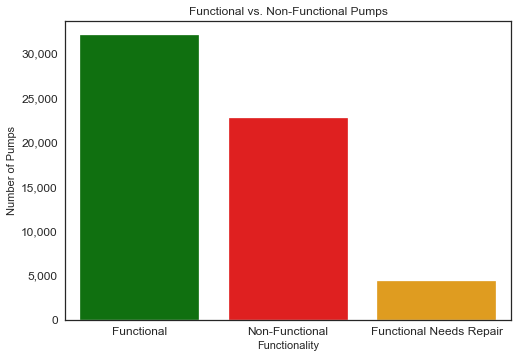

In [182]:
SNS.set_style("white")
SNS.barplot(x=['Functional', 'Non-Functional', 'Functional Needs Repair'], y=[32054, 22658, 4316], palette= ['green', 'red', 'orange']).set(
    title='Functional vs. Non-Functional Pumps', xlabel ='Functionality', ylabel= 'Number of Pumps')
plt.xticks(size=12)
plt.yticks(size=12)
plt.ticklabel_format(axis='y', style='plain')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel = 'Functionality';
plt.savefig("images/FunctionalvNonFunctional.png", dpi=300)

# Final Model

## Rationale

Our rational for using a Stacking Classifier was to use the strengths of both a Random Forest Classifier and XGBoost in one model. We found that a default Random Forest Classifier and XGBoost both performed relatively well in a cross validation, so we combined these models into one using a Stacking Classifier.


In [183]:
# Instantiate final stacking classifier object with our two models
final_model = StackingClassifier(estimators=[('RandForest', rfc_pipe_stack2),
                                             ('XGBoost', xgb_pipe_stack2)],
                                 verbose=3)

In [184]:
# fit our final model to the training data
final_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   46.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.3min finished


StackingClassifier(estimators=[('RandForest',
                                Pipeline(steps=[('CT',
                                                 ColumnTransformer(transformers=[('subpipe_num',
                                                                                  Pipeline(steps=[('ss',
                                                                                                   StandardScaler())]),
                                                                                  [0,
                                                                                   2,
                                                                                   17]),
                                                                                 ('subpipe_cat',
                                                                                  Pipeline(steps=[('ohe',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse=False))]),
                                                                                  [1,
                                                                                   3,
                                                                                   4,
                                                                                   5,
                                                                                   6,
                                                                                   7,
                                                                                   8,
                                                                                   10,
                                                                                   11,
                                                                                   12,
                                                                                   13,
                                                                                   14,
                                                                                   15,
                                                                                   16]),
                                                                                 ('subpipe_ord',
                                                                                  Pipeline(steps=[('ord',
                                                                                                   OrdinalEncoder(...
                                                               interaction_constraints=None,
                                                               learning_rate=0.3,
                                                               max_delta_step=None,
                                                               max_depth=10,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=None,
                                                               scale_pos_weight=None,
                                                               subsample=None,
                                                               tree_meth

In [185]:
final_model.score(X_train, y_train)

0.8759458787919857

In [186]:
final_model.score(X_test, y_test)

0.7895913803618622

In [187]:
print(classification_report(y_test, final_model.predict(X_test)))

                         precision    recall  f1-score   support

             functional       0.78      0.89      0.83      7925
functional needs repair       0.53      0.29      0.38      1086
         non functional       0.84      0.74      0.79      5746

               accuracy                           0.79     14757
              macro avg       0.72      0.64      0.67     14757
           weighted avg       0.78      0.79      0.78     14757



In [189]:
##Plotting ROC curve for final model

In [190]:
from yellowbrick.style import set_palette
set_palette(['green', 'orange', 'red'])

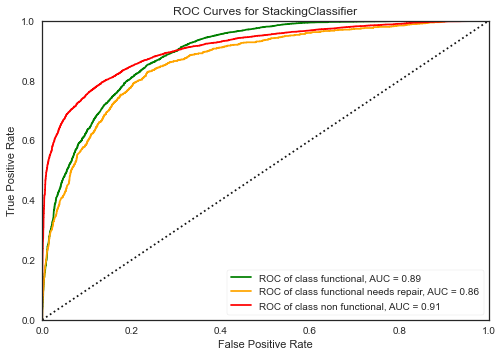

In [191]:
model = stack2
visualizer = ROCAUC(model, micro=False, macro=False)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(outpath="images/ROC.png", dpi=300);  

# Final Model Results:

**Training Accuracy: 88% <br>
Training Recall: 75%**

**Test Accuracy: 79% <br>
Test Recall: 64%**

In [192]:
##Visualizing Final Model vs. Other Models Performance

In [194]:
results_dict = {'Dummy Model': dummy_score, 
                'Random Forest': avg_rf_cv, 
                'XGBoost': avg_XGB_cv, 
                'Stacking Classifier': avg_stack_cv}

In [195]:
dict_keys = list(results_dict.keys())
dict_values = list(results_dict.values())

In [196]:
for i, v in enumerate(results_dict):
    print(i, v)

0 Dummy Model
1 Random Forest
2 XGBoost
3 Stacking Classifier


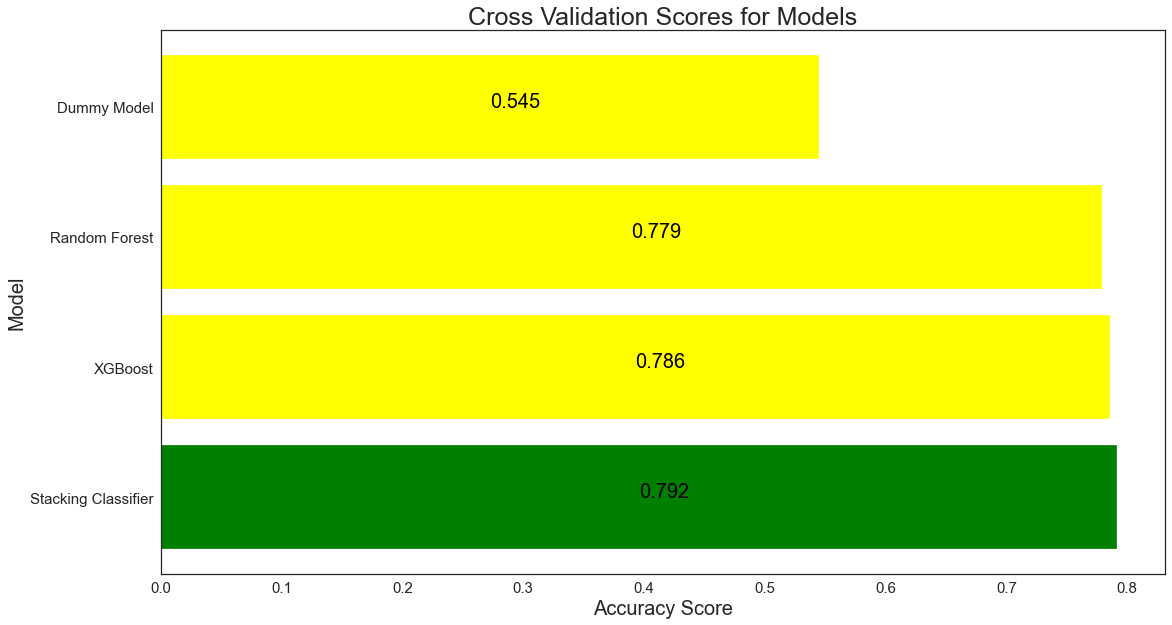

In [197]:
fig, ax = plt.subplots(figsize=(18,10))

ax.barh(dict_keys, dict_values, align='center', color=['yellow', 'yellow', 'yellow', 'green'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy Score', fontsize=20)
ax.set_ylabel('Model', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('Cross Validation Scores for Models', fontsize=25)
for i, v in enumerate(dict_values):
    ax.text(v/2, i, str(round(v, 3)), color='black', fontsize=20)

fig.patch.set_facecolor('white')
plt.savefig('images/ModelAccuracyScores.png', dpi=400, bbox_inches='tight')

In [198]:
#Visualizing Final Model Performance

In [199]:
conf_mat = confusion_matrix(y_test, final_model.predict(X_test))
conf_mat

array([[7074,  182,  669],
       [ 610,  317,  159],
       [1388,   97, 4261]])

The confusion matrix confirms that our model performs best for functional and non-functional water pumps. One point of concern with our model is that the majority of misclassifications for pumps that are functional needing repair are that the pumps are functional. This means we would be overlooking select water pumps that need repair because our model classifies them as functional. The confusion matrix can be seen below:

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


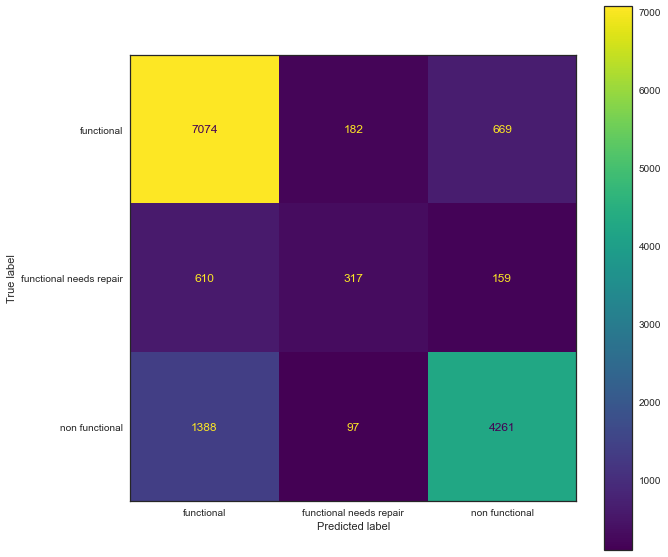

In [203]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(final_model, X_test, y_test, ax=ax)
plt.grid(False)
fig.patch.set_facecolor('white')
plt.savefig("images/ConfusionMatrix.png", dpi=300, bbox_inches='tight')

In [201]:
tot_func = sum(conf_mat[0, :])
tot_func_rep = sum(conf_mat[1, :])
tot_non_func = sum(conf_mat[2, :])

func = np.zeros((1, 3))
func_rep = np.zeros((1, 3))
non_func = np.zeros((1, 3))
for i in range(3):
    func[0, i] = conf_mat[0, i] / tot_func
    func_rep[0, i] = conf_mat[1, i] / tot_func_rep
    non_func[0, i] = conf_mat[2, i] / tot_non_func

prop_func = np.array([func[0,0],
                      func_rep[0,0],
                      non_func[0,0]])

prop_func_rep = np.array([func[0,1],
                          func_rep[0,1],
                          non_func[0,1]])

prop_non_func = np.array([func[0,2],
                          func_rep[0,2],
                          non_func[0,2]])

prop_non_func

array([0.0844164 , 0.14640884, 0.74155935])

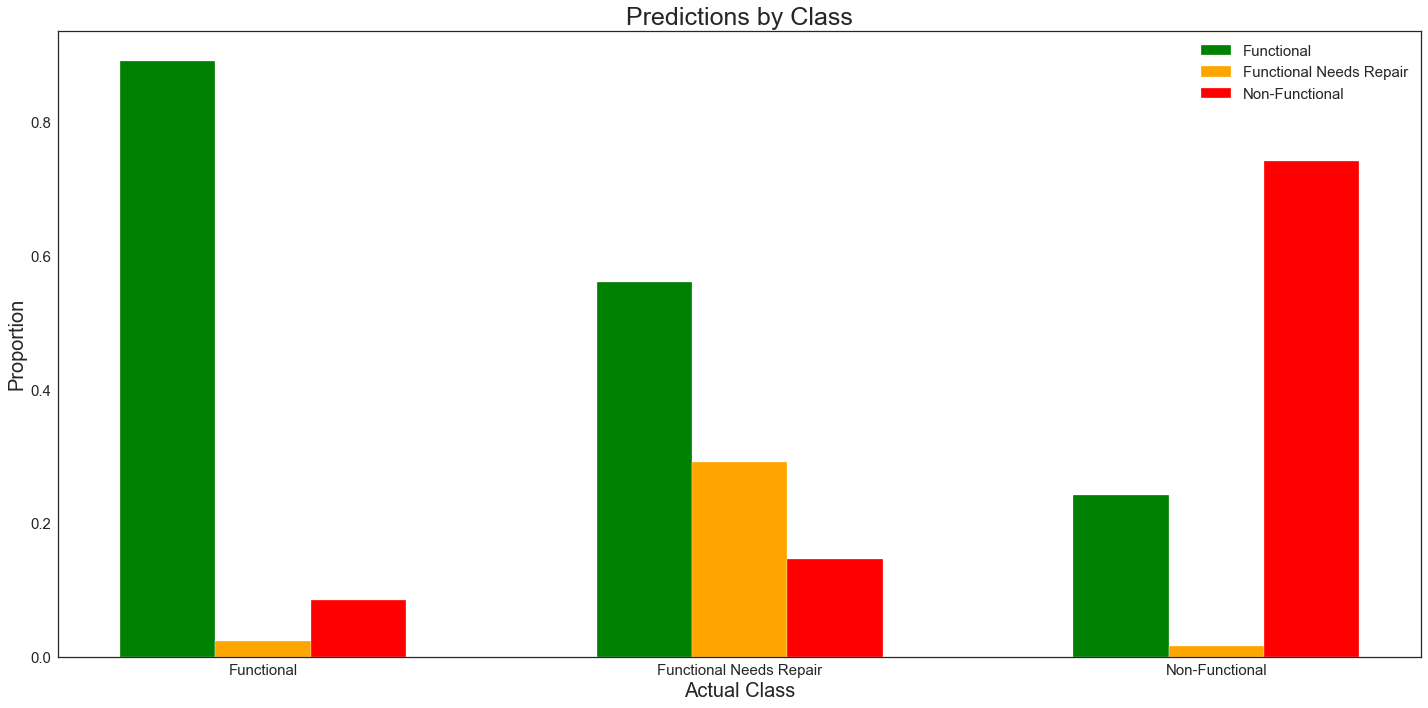

In [202]:
labels = ['Functional', 'Functional Needs Repair', 'Non-Functional']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width, prop_func, width, label='Functional', color='green')
rects2 = ax.bar(x, prop_func_rep, width, label='Functional Needs Repair', color='orange')
rects3 = ax.bar(x + width, prop_non_func, width, label='Non-Functional', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion', fontsize=20)
ax.set_xlabel('Actual Class', fontsize=20)
ax.set_title('Predictions by Class', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=15)

fig.tight_layout()
fig.patch.set_facecolor('white')
plt.savefig('images/preds_by_class.png', dpi=400)

# Limitations

Some limitations that we ran into include:

- Class Imbalance: there are very few data points with Function Needs Repair.
- Time to run models: running multiple GridSearchCV fits can take hours if not days.
- Lack of domain expertise: we are not well versed in what factors for water pumps contribute to its ability to function or not  

# Next Steps

With more time and resources, here are a few next steps that we would like to pursue for this project:

- Treat problem as binary classification: given that a pump labeled "Functional needs Repair" could become non-functional at any time, we could label these pumps as non-functional. Thus, if our model predicts it is non-functional, a maintenance crew will still go check to pump to perform repairs.
- Further tune model: with more time, we could run more grid searches with more hyper parameters included. Some of these grid searches could take multiple days, so we would need significantly more time to optimize the final Stacking Classifier.
- Explore other models: in this project, we used Logistic Regression, KNN, Decision Tree Classifier, Random Forest Classifier, XGBoost, and Stacking Classifier models. We could look into other boosting models as well as simple neural networks to better predict our data set classes.
- Consult with a domain expert to achieve a better understanding of the water crisis plaguing Tanzania and how the functionality of water pumps relates to this issue.

# Conclusion